In [1]:
from src_trainer.mmvae_model import MMVAE_model
import anndata as ad
import numpy as np
from scipy.sparse import csc_matrix
import pandas as pd

Global seed set to 0


## Import model

SCVI RNA model from Training scenario 2 (left out perturbed conditions of population LD during training) 

In [2]:
my_model = MMVAE_model.load("../input/{}_{}".format('MMVAE', '20220518-225027'))

{'func': 'train_model', 'dataset_path': '../data/czi_data.h5ad', 'model_type': 'MMVAE', 'cat_cov_keys': ['annotation_L1', 'group', 'condition'], 'ood_key': None, 'ood_condition': None, 'train_size': 0.8, 'subset_data': 'PG_AD', 'subset_popGroup': 'LD', 'subset_AD': 'PI', 'n_hvg': 5000, 'seed': 0, 'hparams': {'vae_n_hidden': 128, 'vae_n_latent': 20, 'vae_n_layers': 2, 'vae_dropout': 0.1, 'vae_lr': 0.0001, 'vae_wd': 1e-06, 'batch_size': 128, 'gene_likelihood': 'nb'}, 'max_epochs': 400, 'check_val_every_n_epoch': 20, 'save_dir': '..', 'save_model': True, 'save_anndata': True, 'sweep_seeds': 200, 'model_name': '20220518-225027'}
Encode covariates: True, Cat_cov: [8, 3, 2]


## Loss evaluation

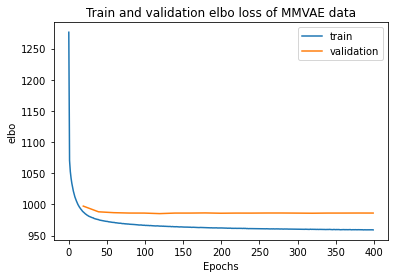

Minimal elbo train value: elbo_train    959.186462
Name: 399, dtype: object and val value: elbo_validation    986.206787
Name: 399, dtype: object
Minimal reconstruction_loss train value: reconstruction_loss_train    950.796143
Name: 399, dtype: object and val value: reconstruction_loss_validation    978.318176
Name: 399, dtype: object
Minimal kl_local train value: kl_local_train    8.39049
Name: 399, dtype: object and val value: kl_local_validation    7.888849
Name: 399, dtype: object


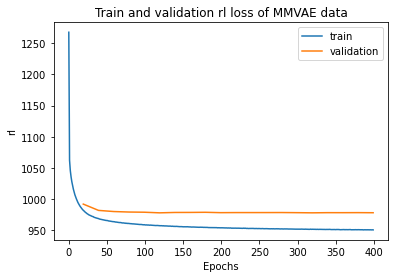

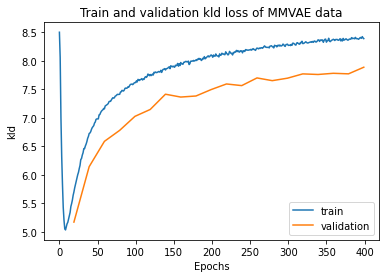

In [4]:
from src_trainer.plotting import plot_single_value, plot_train_val

args_elbo = {'var': "elbo",
             'var_label': "elbo",
             'ylim': None,
             'modality': my_model.args['model_type']
             }
args_rl = {'var': "reconstruction_loss",
           'var_label': "rl",
           'ylim': None,
           'modality': my_model.args['model_type']
           }
args_kld = {'var': "kl_local",
            'var_label': "kld",
            'ylim': None,
            'modality': my_model.args['model_type']
            }

list_args = [args_elbo, args_rl, args_kld]

for plot_args in list_args:
    if my_model.args['check_val_every_n_epoch'] is not None:
        plot_train_val(my_model, plot_args=plot_args, pdf=None)
    else:
        plot_single_value(my_model, plot_args, 'train')
        
    print("Minimal {} train value: {} and val value: {}".format(
        plot_args['var'], 
        my_model.history['{}_train'.format(plot_args['var'])].iloc[-1],
        my_model.history['{}_validation'.format(plot_args['var'])].iloc[-1],
    ))

# Evaluation reconstructions



In [3]:
from src_trainer.plotting import get_cat_covs, figure_caption, plot_reconstruction, compare_hvg, evaluate_corr

cond_dict = {'group': 'LD',
             'annotation_L1': None,
             'condition': 'PI'}

marker_dict = {'CD4T': [['CD3D', 'CD4'], ['CD3_ADT', 'CD4_ADT']],
                'B': [['MS4A1', 'CD19', 'CD79A'], ['CD19_ADT', 'CD20_ADT']],
                'Monocyte': [['S100A9', 'CD14'], ['CD14_ADT', 'CD16_ADT']]}

all_markers = my_model.adata.var_names
data = my_model.adata.copy()

## Spearman correlations

Posterior sampling

Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Invalid combination: LD, B and PI
Posterior sampling
Invalid combination: LD, CD4T and PI
Posterior sampling
Invalid combination: LD, CD8T and PI
Posterior sampling
Invalid combination: LD, DC and PI
Posterior sampling
Invalid combination: LD, Monocyte and PI
Posterior sampling
Invalid combination: LD, NK and PI
Posterior sampling
Invalid combination: LD, OtherT and PI
Posterior sampling
Invalid combination: LD, Platelet and PI
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior sampling
Posterior samplin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

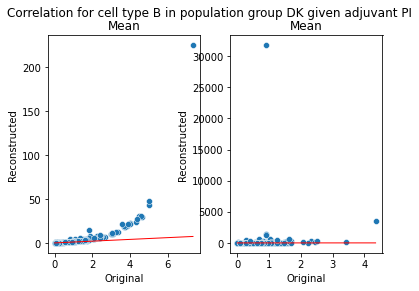

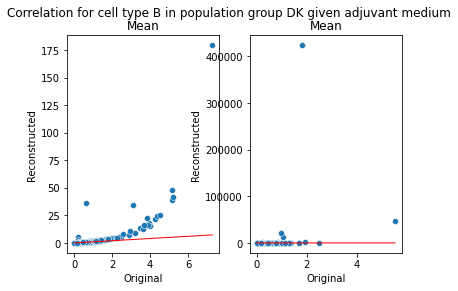

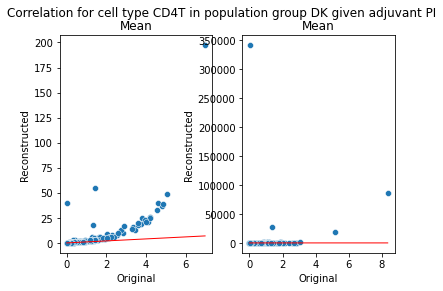

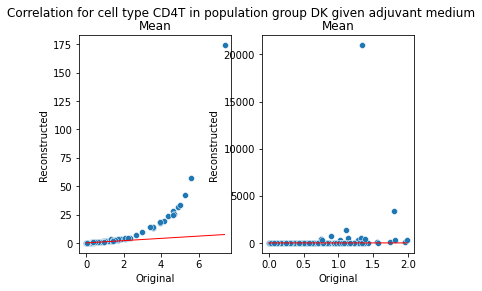

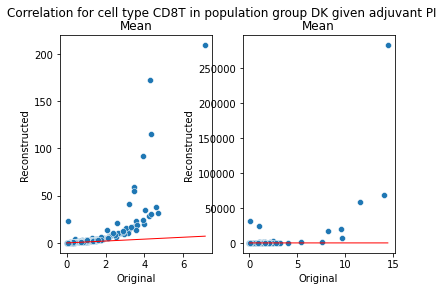

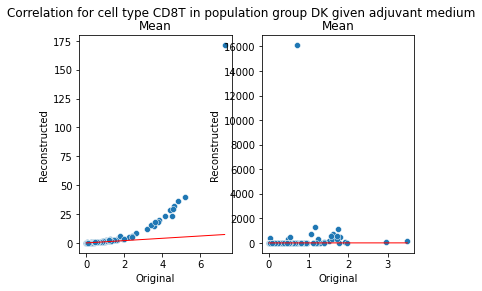

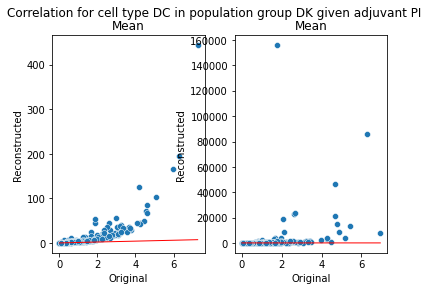

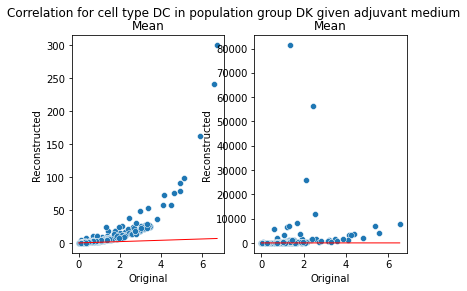

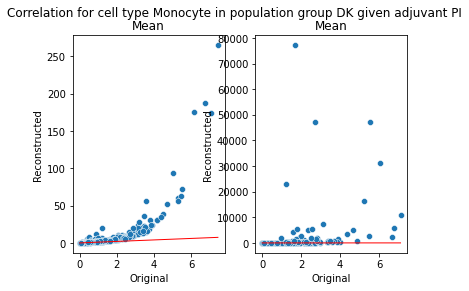

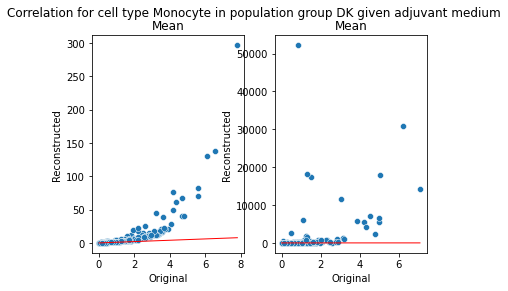

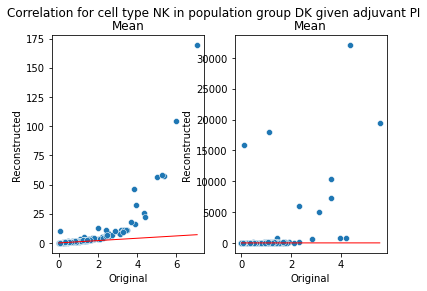

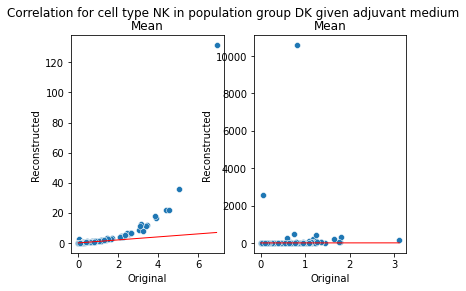

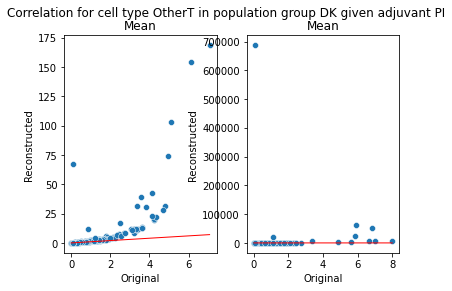

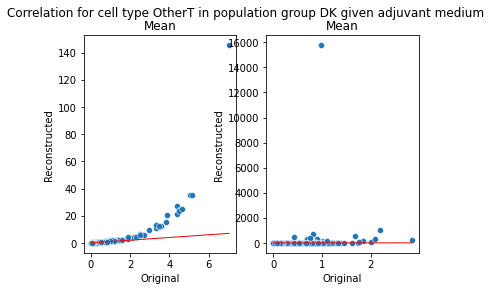

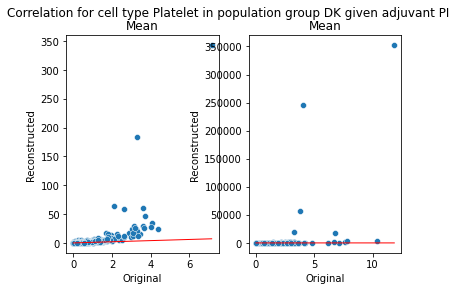

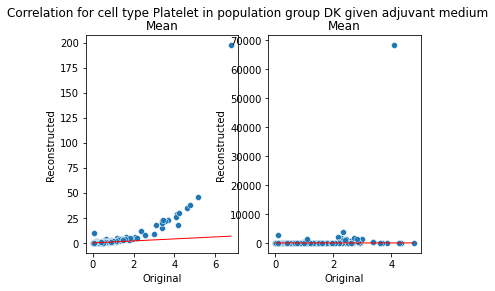

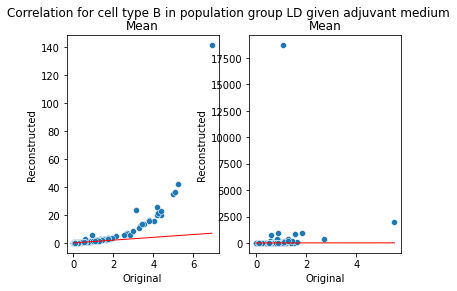

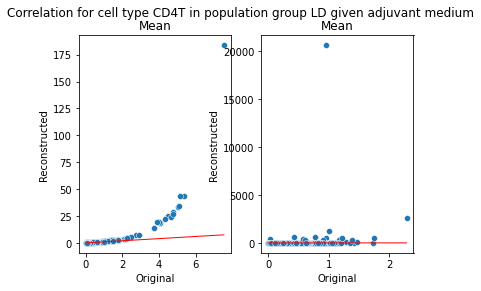

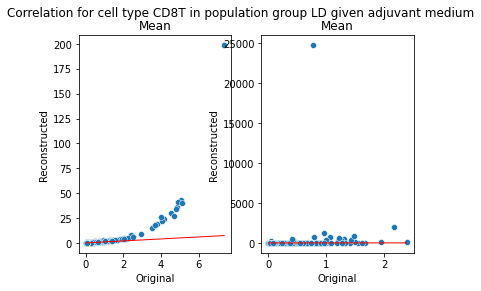

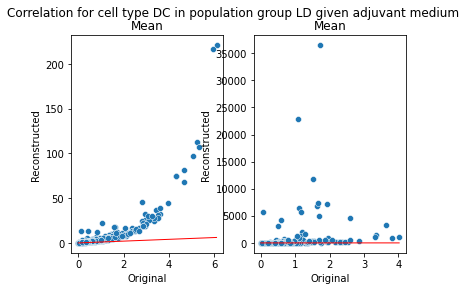

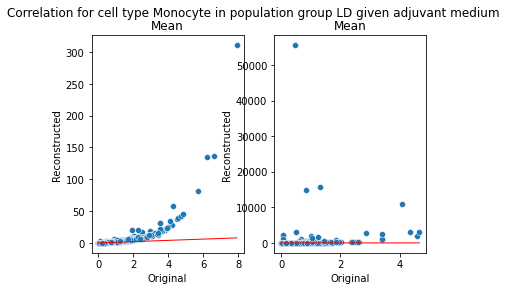

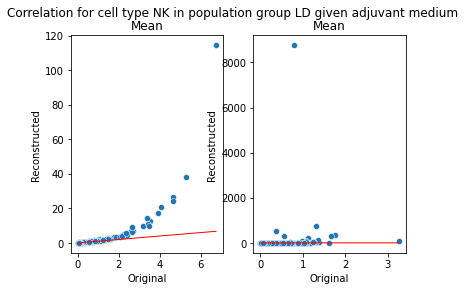

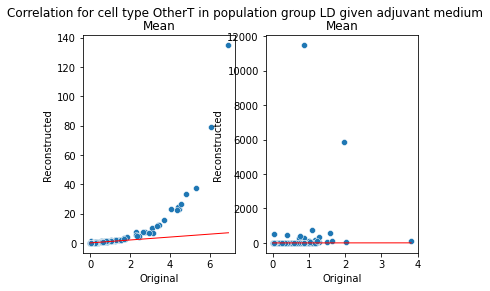

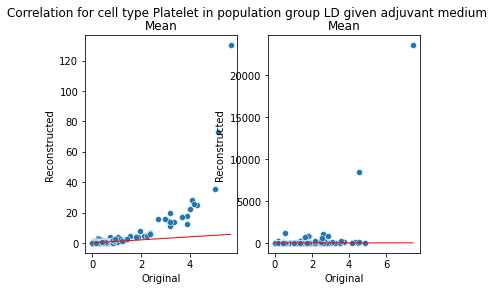

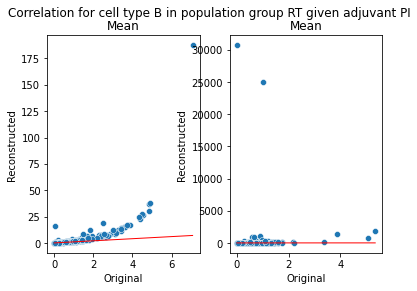

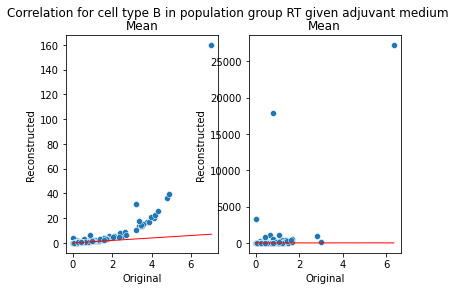

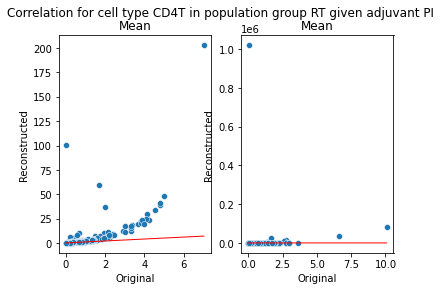

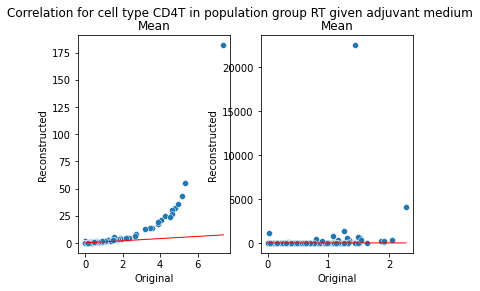

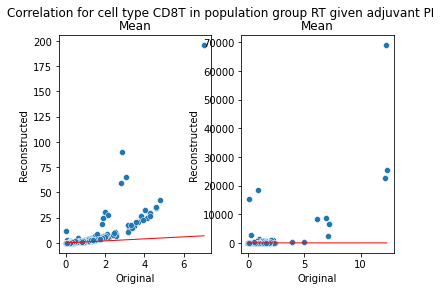

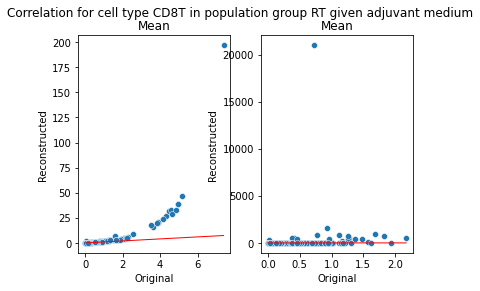

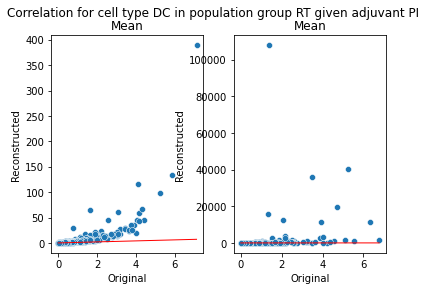

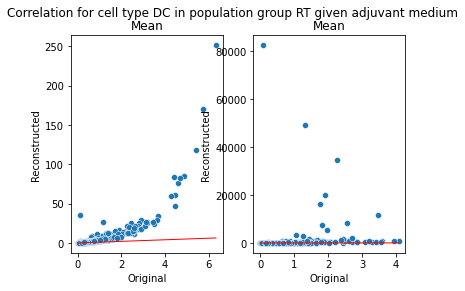

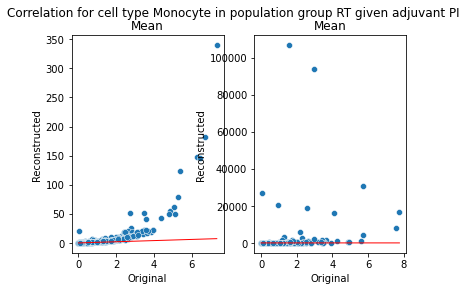

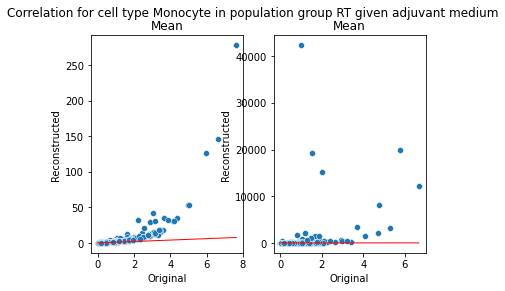

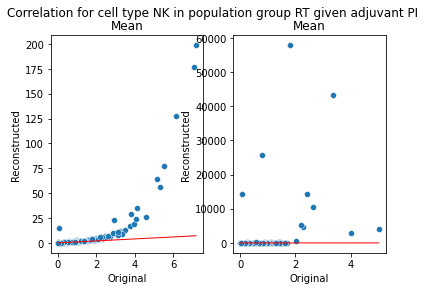

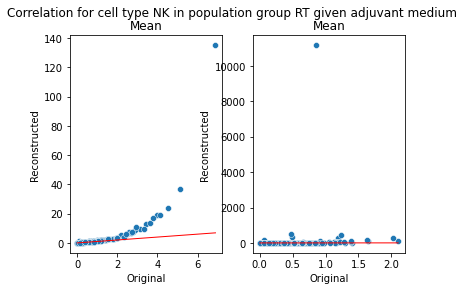

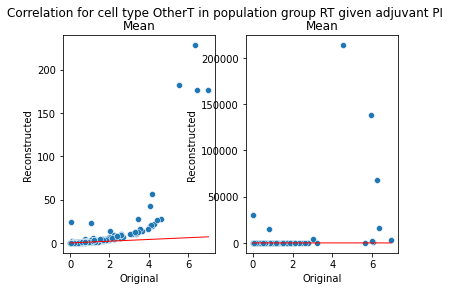

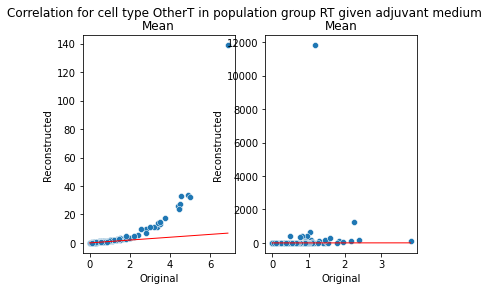

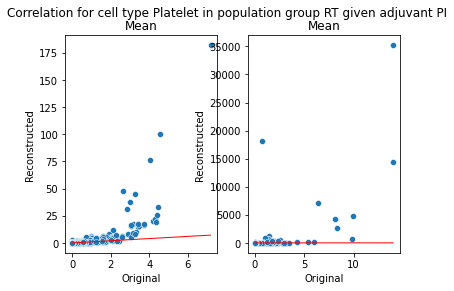

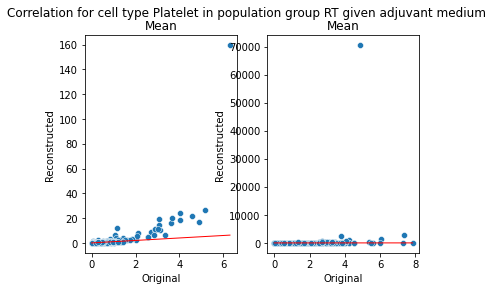

In [5]:
evaluate_corr(my_model, sample_dist = "posterior", plot_corr=True)

Prior sampling

In [ ]:
evaluate_corr(my_model, sample_dist = "prior", plot_corr=False)

Cell type: B Nr. DE genes: 4545, Nr. de idx: 1852
Cell type: CD4T Nr. DE genes: 7777, Nr. de idx: 3113
Cell type: CD8T Nr. DE genes: 6867, Nr. de idx: 2794
Cell type: DC Nr. DE genes: 1782, Nr. de idx: 974
Cell type: Monocyte Nr. DE genes: 4186, Nr. de idx: 1904
Cell type: NK Nr. DE genes: 4751, Nr. de idx: 2012
Cell type: OtherT Nr. DE genes: 3629, Nr. de idx: 1466
Cell type: Platelet Nr. DE genes: 195, Nr. de idx: 77
Cell type: B Nr. DE genes: 4545, Nr. de idx: 1852


Transfer sampling

In [ ]:
evaluate_corr(my_model, sample_dist = "transfer", plot_corr=False)

## Transfer predictive sampling  

Predict *perturbed* condition with encoder input *medium*

In [6]:
adata = ad.read(my_model.args["dataset_path"])

for cell_type, markers_list in marker_dict.items():
    cond_dict['annotation_L1'] = cell_type
    cond_dict['condition'] = 'PI'
    _, indices = get_cat_covs(my_model, cond_dict)
    cond_dict['condition'] = 'medium'
    cat_covs, _ = get_cat_covs(my_model, cond_dict)
    recon = my_model.transfer_predictive_sample(adata=my_model.adata,
                                                indices=indices,
                                                cat_covs=cat_covs)
    recon_adata = ad.AnnData(csc_matrix(pd.DataFrame(recon, columns=all_markers)))
    recon_adata.var_names = all_markers
    
    for marker in markers_list[0]:
        gene_mask = np.where([True if gene in marker else False for gene in all_markers])[0].tolist()
        if not np.any(gene_mask):
            print("Gene marker {} not in data".format(marker))
            continue
        txt = figure_caption('RNA', marker, cell_type, cond_dict['group'], cond_dict['condition'])
        plot_reconstruction(data, recon_adata, gene_mask, txt, all_markers, indices, pdf=None, i=0)
        
    # calculate correlation
    # corr = get_feature_correlation_matrix(adata=adata[indices_org], pred_x=recon, plot_corr=True, cell_type=cell_type, pdf=pdf)
    # print("The correlation values are: {}".format(corr))
    
    # compare hvg
    common_hvg = compare_hvg(recon_adata=recon_adata, org_adata=my_model.adata, n_top_genes=1000)

    

NotImplementedError: There were no tensor arguments to this function (e.g., you passed an empty list of Tensors), but no fallback function is registered for schema aten::_cat.  This usually means that this function requires a non-empty list of Tensors, or that you (the operator writer) forgot to register a fallback function.  Available functions are [CPU, QuantizedCPU, BackendSelect, Named, ADInplaceOrView, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, UNKNOWN_TENSOR_TYPE_ID, AutogradMLC, AutogradHPU, AutogradNestedTensor, AutogradPrivateUse1, AutogradPrivateUse2, AutogradPrivateUse3, Tracer, Autocast, Batched, VmapMode].

CPU: registered at aten/src/ATen/RegisterCPU.cpp:16286 [kernel]
QuantizedCPU: registered at aten/src/ATen/RegisterQuantizedCPU.cpp:1025 [kernel]
BackendSelect: fallthrough registered at ../aten/src/ATen/core/BackendSelectFallbackKernel.cpp:3 [backend fallback]
Named: registered at ../aten/src/ATen/core/NamedRegistrations.cpp:7 [backend fallback]
ADInplaceOrView: fallthrough registered at ../aten/src/ATen/core/VariableFallbackKernel.cpp:60 [backend fallback]
AutogradOther: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradCPU: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradCUDA: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradXLA: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
UNKNOWN_TENSOR_TYPE_ID: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradMLC: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradHPU: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradNestedTensor: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradPrivateUse1: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradPrivateUse2: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
AutogradPrivateUse3: registered at ../torch/csrc/autograd/generated/VariableType_2.cpp:9928 [autograd kernel]
Tracer: registered at ../torch/csrc/autograd/generated/TraceType_2.cpp:9621 [kernel]
Autocast: registered at ../aten/src/ATen/autocast_mode.cpp:259 [kernel]
Batched: registered at ../aten/src/ATen/BatchingRegistrations.cpp:1019 [backend fallback]
VmapMode: fallthrough registered at ../aten/src/ATen/VmapModeRegistrations.cpp:33 [backend fallback]


## Prior predictive sampling (scenario 2)

Predict perturbed condition from left out population (LD) given samples from the Gaussian prior distribution.

In [ ]:
for cell_type, markers_list in marker_dict.items():
    cond_dict['annotation_L1'] = cell_type
    cat_covs, indices = get_cat_covs(my_model, cond_dict)
    n_sample = my_model.adata[indices].n_obs
    recon = my_model.prior_predictive_sample(cat_covs=cat_covs,
                                              n_samples=n_sample,)
    recon_adata = ad.AnnData(csc_matrix(pd.DataFrame(recon, columns=all_markers)))
    recon_adata.var_names = all_markers

    # calculate correlation
    #corr = get_feature_correlation_matrix(adata=data[indices], pred_x=recon, plot_corr=True, cell_type=cell_type, pdf=pdf)

    # compare hvg
    #common_hvg = compare_hvg(recon_adata=recon_adata, org_adata=data, n_top_genes=n_top_hvg)
    
    for marker in markers_list[0]:
        gene_mask = np.where([True if gene in marker else False for gene in all_markers])[0].tolist()
        if not np.any(gene_mask):
            print("Gene marker {} not in data".format(marker))
            continue
        txt = figure_caption('RNA', marker, cell_type, cond_dict['group'], cond_dict['condition'])
        plot_reconstruction(data, recon_adata, gene_mask, txt, all_markers, indices, pdf=None, i=0)